In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import os
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:

sns.set_context("paper")

color_set=['deep','muted','pastel','bright','dark','colorblind']
sns.set_palette(color_set[1])


large=12
med=9
small=6
ss=10
sss=8
ssss=6


matplotlib.rcParams['figure.figsize']=(3.2,2.8)
matplotlib.rcParams['figure.dpi'] = 600
 
matplotlib.rcParams['font.sans-serif'] = ['Arial']   
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.style']='normal'
matplotlib.rcParams['font.weight']='bold'
matplotlib.rcParams["axes.labelweight"] = "bold"

matplotlib.rcParams['axes.titlesize'] =sss
#matplotlib.rcParams['axes.titlepad'] =-0.5
matplotlib.rcParams['legend.fontsize'] =ss
matplotlib.rcParams['axes.labelsize'] =ss
matplotlib.rcParams['xtick.labelsize'] =ss
matplotlib.rcParams['ytick.labelsize'] = ss
matplotlib.rcParams['figure.titlesize'] =sss



matplotlib.rcParams['xtick.major.width'] = 0.6
matplotlib.rcParams['ytick.major.width'] = 0.6

matplotlib.rcParams['xtick.major.size'] = 1.3
matplotlib.rcParams['ytick.major.size'] = 1.3

matplotlib.rcParams['xtick.major.pad'] = 1.5
matplotlib.rcParams['ytick.major.pad'] = 1.5



matplotlib.rcParams['axes.linewidth'] = 0.6

matplotlib.rcParams['lines.linewidth'] = 1.0
#matplotlib.rcParams['lines.markersize'] = 1.2

scatter_s=20


ref_line_color=['#4d4d4d', 'red']
ref_line_size=0.8

#matplotlib.rcParams['xtick.direction'] = 'in'

In [3]:

data_train = pd.read_excel('data_train.xlsx')
data_test = pd.read_excel('data_test.xlsx')
data_final_test = pd.read_excel('data_final_test.xlsx')

In [4]:

#print(data_train.info())
#print(data_test.info())

#data_train = data_train.astype(float)
#data_test = data_test.astype(float)

In [5]:

X_train = data_train.iloc[:,1:6]
y_train = data_train.iloc[:,0]

X_col = X_train.columns


X_test = data_test.iloc[:,1:6]
y_test = data_test.iloc[:,0]


X_final_test = data_final_test.iloc[:,1:6]
y_final_test = data_final_test.iloc[:,0]

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)  

X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

X_train_standard = pd.DataFrame(X_train_standard,columns=X_col)
X_test_standard = pd.DataFrame(X_test_standard,columns=X_col)

In [7]:
X_train_standard_np = X_train_standard.values
X_test_standard_np = X_test_standard.values
y_train_np = y_train.values
y_test_np = y_test.values
y_final_test_np = y_final_test.values

Mean Absolute Error MAE: 0.01961950148356296
test rmse scores :  0.027063925000318977
test R2 scores :  0.7062641317241394


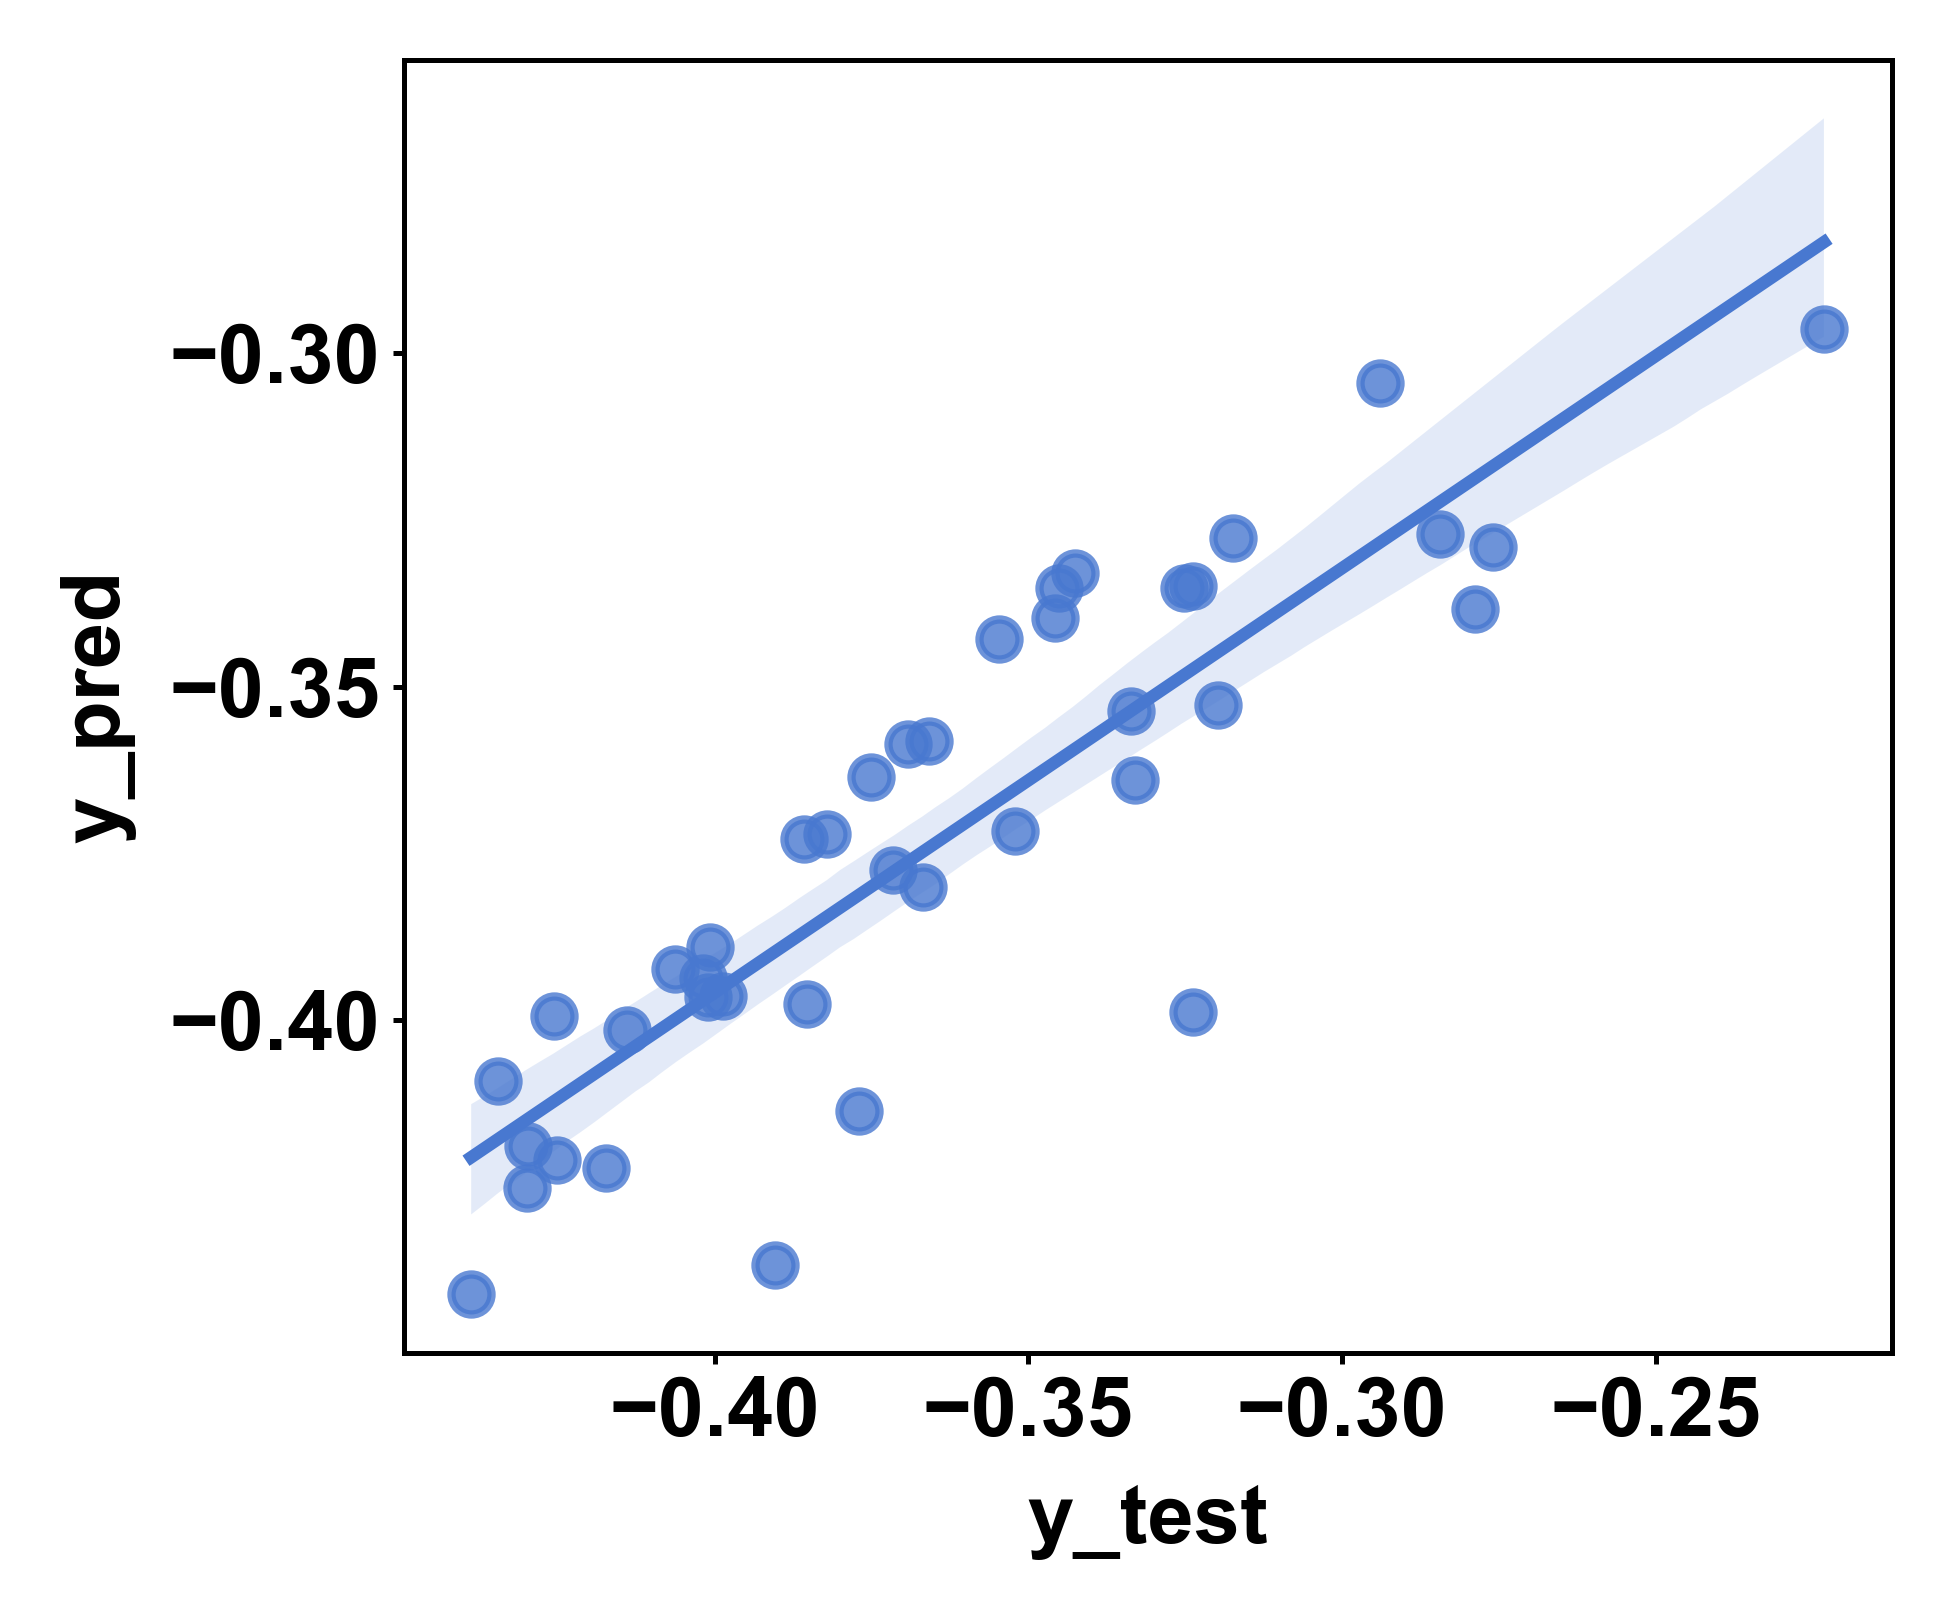

In [8]:
from sklearn.linear_model import Ridge
Ridge_default = Ridge()
Ridge_default.fit(X_train_standard_np,y_train_np)
y_pred_default=Ridge_default.predict(X_test_standard_np)


x_1,y_1=pd.Series(y_test_np,name='y_test'),pd.Series(y_pred_default,name='y_pred') 
sns.regplot(x=x_1,y=y_1)
plt.show


#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_test_np,y_pred_default))
r2 = r2_score(y_test_np,y_pred_default)


print(f'Mean Absolute Error MAE: {mean_absolute_error(y_test_np,y_pred_default)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

In [9]:
print(Ridge_default.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


alphas = np.logspace(-6, 6, 13)
r2_scores_totle = []
alpha_storage = []
screen_data =[]
kf = KFold(n_splits=5, shuffle=True, random_state=1 )

for i in alphas:
    RI_KF = Ridge(alpha=i)
    alpha_storage.append(i)
    r2_scores = []
    for train, test in kf.split(X_train_standard_np):
        X_train_k, X_test_k = X_train_standard_np[train], X_train_standard_np[test]
        y_train_k, y_test_k = y_train_np[train], y_train_np[test]
        RI_KF.fit(X_train_k,y_train_k)
        y_pred_k=RI_KF.predict(X_test_k)
        r2 = r2_score(y_test_k,y_pred_k)
        r2_scores.append(r2)
    print(i)
    print(r2_scores)
    average = np.mean(r2_scores)
    screen_data.append({i:average})
    r2_scores_totle.append(r2_scores)

max_data = max(screen_data, key=lambda x: list(x.values())[0])
x=float(list(max_data.keys())[0])
print(x)

1e-06
[0.8147808006202035, 0.7590889808561555, 0.7055034117877216, 0.8350129448100745, 0.8351571992635443]
1e-05
[0.8147808246089313, 0.7590889698986771, 0.7055034172202959, 0.8350129482865167, 0.8351571853548598]
0.0001
[0.8147810644955324, 0.759088860323739, 0.7055034715456793, 0.8350129830505555, 0.8351570462678556]
0.001
[0.8147834632938826, 0.7590877645591313, 0.7055040147635994, 0.8350133306524743, 0.8351556553819349]
0.01
[0.8148074445120712, 0.759076805390468, 0.705509443351992, 0.8350168028251612, 0.835141744935181]
0.1
[0.8150465809862665, 0.7589670616898692, 0.7055633706158213, 0.8350511403919894, 0.8350024819946517]
1.0
[0.8173711904338783, 0.7578546653051068, 0.7060672374655452, 0.8353565852208388, 0.8335942840596136]
10.0
[0.8346827764539158, 0.7454533506221345, 0.7079791541908228, 0.8350593285714819, 0.8182052690410127]
100.0
[0.7718796861589527, 0.5931852253150248, 0.6116166549359783, 0.7100203394645122, 0.6421094782315809]
1000.0
[0.2359708465103666, 0.1406870515034017

In [11]:

data = pd.read_excel('data_final.xlsx')


#data = data.astype(float)
#data.info()


X_all = data.iloc[:,1:6]
y_all = data.iloc[:,0]


X_all_np=X_all.values
y_all_np=y_all.values

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_all = StandardScaler()
RI_all = Ridge(alpha=float(list(max_data.keys())[0]))


feature_imp_set=[]


train_rmse_scores = []
train_r2_scores = []
train_mae_scores = []

test_rmse_scores = []
test_r2_scores = []
test_mae_scores = []

final_test_rmse_scores = []
final_test_r2_scores = []
final_test_mae_scores = []


n = 20


for i in range(n):
    X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, shuffle=True, random_state=i)

    
    scaler_all.fit(X_all_train)
    X_all_train_standard = scaler_all.transform(X_all_train)
    X_all_test_standard = scaler_all.transform(X_all_test)
    X_final_test_standard_all = scaler_all.transform(X_final_test)
    
    RI_all.fit(X_all_train_standard, y_all_train)

    y_all_train_pred = RI_all.predict(X_all_train_standard)
    train_rmse = np.sqrt(mean_squared_error(y_all_train, y_all_train_pred))
    train_rmse_scores.append(train_rmse)
    train_r2 = r2_score(y_all_train, y_all_train_pred)
    train_r2_scores.append(train_r2)
    train_mae = mean_absolute_error(y_all_train, y_all_train_pred)
    train_mae_scores.append(train_mae)

    y_all_test_pred = RI_all.predict(X_all_test_standard)
    test_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_test_pred))
    test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_all_test, y_all_test_pred)
    test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_all_test, y_all_test_pred)
    test_mae_scores.append(test_mae)

    y_final_test_pred_all = RI_all.predict(X_final_test_standard_all)
    test_rmse = np.sqrt(mean_squared_error(y_final_test_np, y_final_test_pred_all))
    final_test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_final_test_np, y_final_test_pred_all)
    final_test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_final_test_np, y_final_test_pred_all)
    final_test_mae_scores.append(test_mae)

################################


results_dict = {
    'method': ['RI'] * (3 * n),
    'set_type': ['Train'] * n + ['Test'] * n + ['Final_Test'] * n,
    'MAE': train_mae_scores + test_mae_scores + final_test_mae_scores,
    'RMSE': train_rmse_scores + test_rmse_scores + final_test_rmse_scores,
    'R2': train_r2_scores + test_r2_scores + final_test_r2_scores
}
results_df = pd.DataFrame(results_dict)

excel_filename = 'model_evaluation_results_5fea.xlsx'
results_df.to_excel(excel_filename, index=False)

In [13]:

print('train set')
print(f'Average MAE score: {np.mean(train_mae_scores):.4f} ± {np.std(train_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(train_rmse_scores):.4f} ± {np.std(train_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(train_r2_scores):.4f} ± {np.std(train_r2_scores):.4f}')

print('\ntest set:')
print(f'Average MAE score: {np.mean(test_mae_scores):.4f} ± {np.std(test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(test_rmse_scores):.4f} ± {np.std(test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(test_r2_scores):.4f} ± {np.std(test_r2_scores):.4f}')

print('\nindependent test set:')
print(f'Average MAE score: {np.mean(final_test_mae_scores):.4f} ± {np.std(final_test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(final_test_rmse_scores):.4f} ± {np.std(final_test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(final_test_r2_scores):.4f} ± {np.std(final_test_r2_scores):.4f}')

print(f'\nResults have been saved to {excel_filename}')

#可选：显示数据框的前几行，确认格式正确
print('\nDataFrame preview:')
print(results_df.head())


#打印测试集的最好的评估结果
print('best test set:')
min_mae = min(test_mae_scores)
min_mae_index = test_mae_scores.index(min_mae)
print('min MAE score:', min_mae, '    ', 'random_state=', min_mae_index)

min_rmse = min(test_rmse_scores)
min_rmse_index = test_rmse_scores.index(min_rmse)
print('min RMSE score:', min_rmse, '    ', 'random_state=', min_rmse_index)

max_r2 = max(test_r2_scores)
max_r2_index = test_r2_scores.index(max_r2)
print('max R2 score:', max_r2, '    ', 'random_state=', max_r2_index)

print('independent test set:')
final_min_mae = min(final_test_mae_scores)
final_min_mae_index = final_test_mae_scores.index(final_min_mae)
print('min MAE score:', final_min_mae, '    ', 'random_state=', final_min_mae_index)

final_min_rmse = min(final_test_rmse_scores)
final_min_rmse_index = final_test_rmse_scores.index(final_min_rmse)
print('min RMSE score:', final_min_rmse, '    ', 'random_state=', final_min_rmse_index)

final_max_r2 = max(final_test_r2_scores)
final_max_r2_index = final_test_r2_scores.index(final_max_r2)
print('max R2 score:', final_max_r2, '    ', 'random_state=', final_max_r2_index)

train set
Average MAE score: 0.0141 ± 0.0006
Average RMSE score: 0.0190 ± 0.0007
Average R2 score: 0.7796 ± 0.0119

test set:
Average MAE score: 0.0151 ± 0.0017
Average RMSE score: 0.0197 ± 0.0027
Average R2 score: 0.7734 ± 0.0447

independent test set:
Average MAE score: 0.0130 ± 0.0003
Average RMSE score: 0.0168 ± 0.0005
Average R2 score: 0.5960 ± 0.0251

Results have been saved to model_evaluation_results_5fea.xlsx

DataFrame preview:
  method set_type       MAE      RMSE        R2
0     RI    Train  0.014602  0.019498  0.761491
1     RI    Train  0.012502  0.016746  0.806429
2     RI    Train  0.014116  0.018842  0.776958
3     RI    Train  0.014392  0.019181  0.769132
4     RI    Train  0.013614  0.018111  0.787820
best test set:
min MAE score: 0.011959494631648937      random_state= 16
min RMSE score: 0.014523293223487405      random_state= 16
max R2 score: 0.8389048536737634      random_state= 0
independent test set:
min MAE score: 0.012377698551790514      random_state= 13
min 

train Mean Absolute Error MAE: 0.013800279703584422
train rmse scores :  0.0183751444429543
train R2 scores :  0.7927720580178826


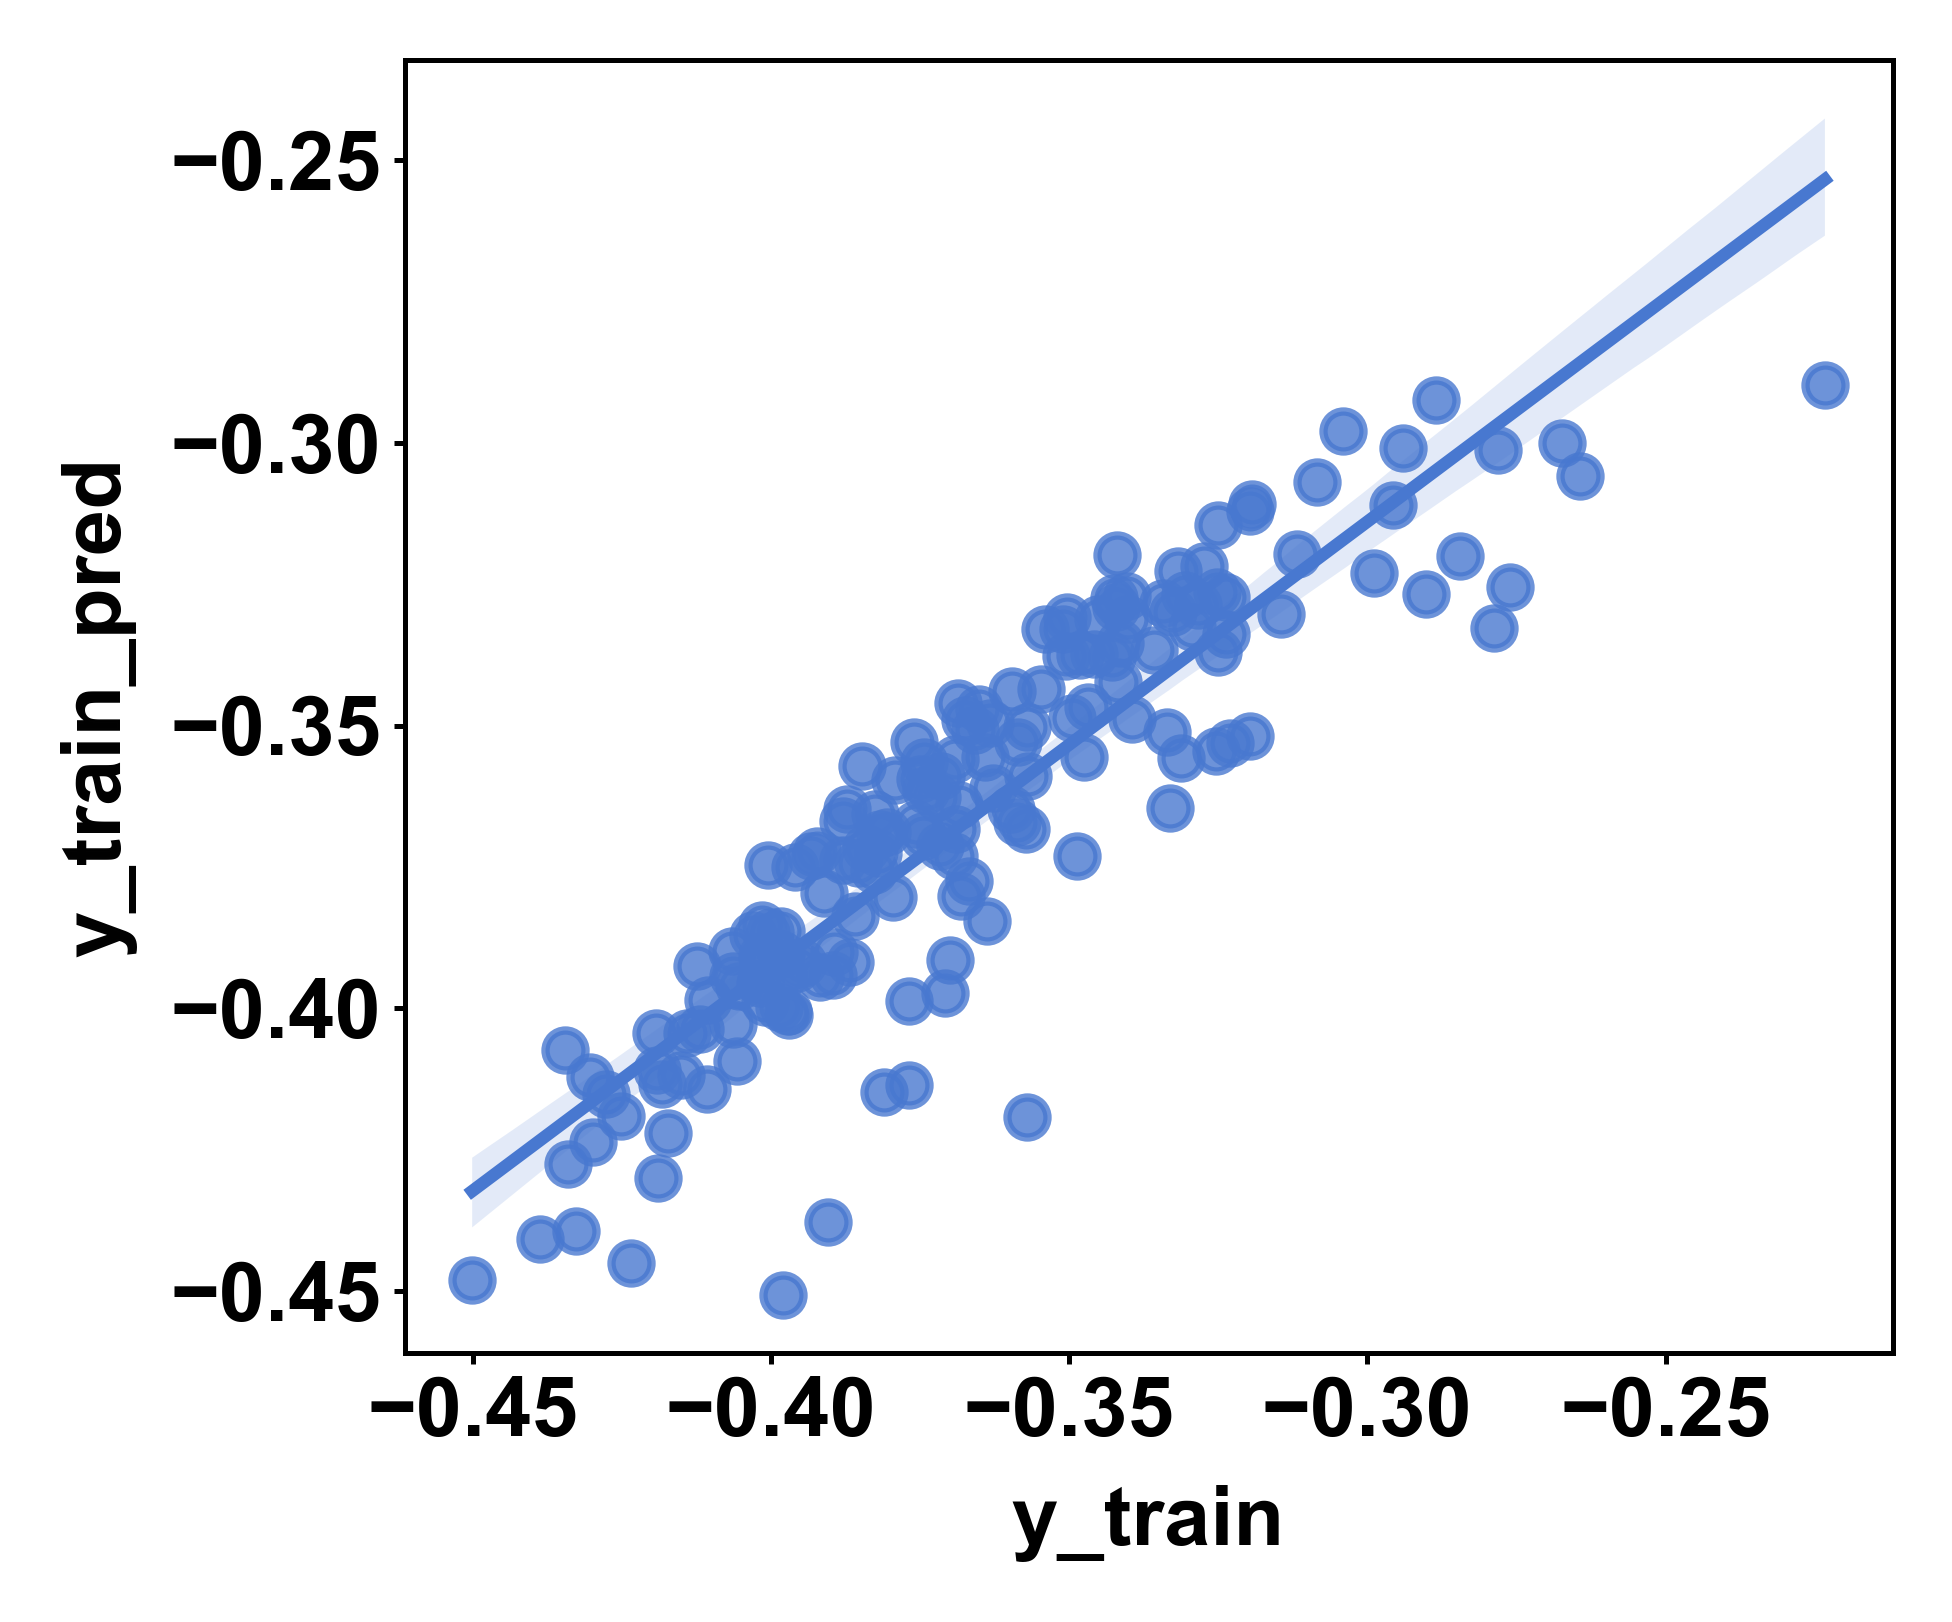

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

max_index=final_max_r2_index

X_train_best,X_test_best,y_train_best,y_test_best = train_test_split(X_all,y_all,test_size=0.2,shuffle=True,random_state=max_index) 


scaler_best = StandardScaler()
scaler_best.fit(X_train_best)
X_train_best_standard = scaler_best.transform(X_train_best)
X_test_best_standard = scaler_best.transform(X_test_best)
X_final_test_standard_best = scaler_best.transform(X_final_test)


RI_best = Ridge(alpha=float(list(max_data.keys())[0]))
RI_best.fit(X_train_best_standard, y_train_best)
y_train_best_pred=RI_best.predict(X_train_best_standard)

x_best_1,y_best_1=pd.Series(y_train_best,name='y_train'),pd.Series(y_train_best_pred,name='y_train_pred')
sns.regplot(x=x_best_1,y=y_best_1)
plt.show

#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_train_best, y_train_best_pred))
r2 = r2_score(y_train_best, y_train_best_pred)


print(f'train Mean Absolute Error MAE: {mean_absolute_error(y_train_best,y_train_best_pred)}')
print ('train rmse scores : ',rmse)
print ('train R2 scores : ',r2)

test Mean Absolute Error MAE: 0.016651412999188587
test rmse scores :  0.022372922477196154
test R2 scores :  0.7082313549190462


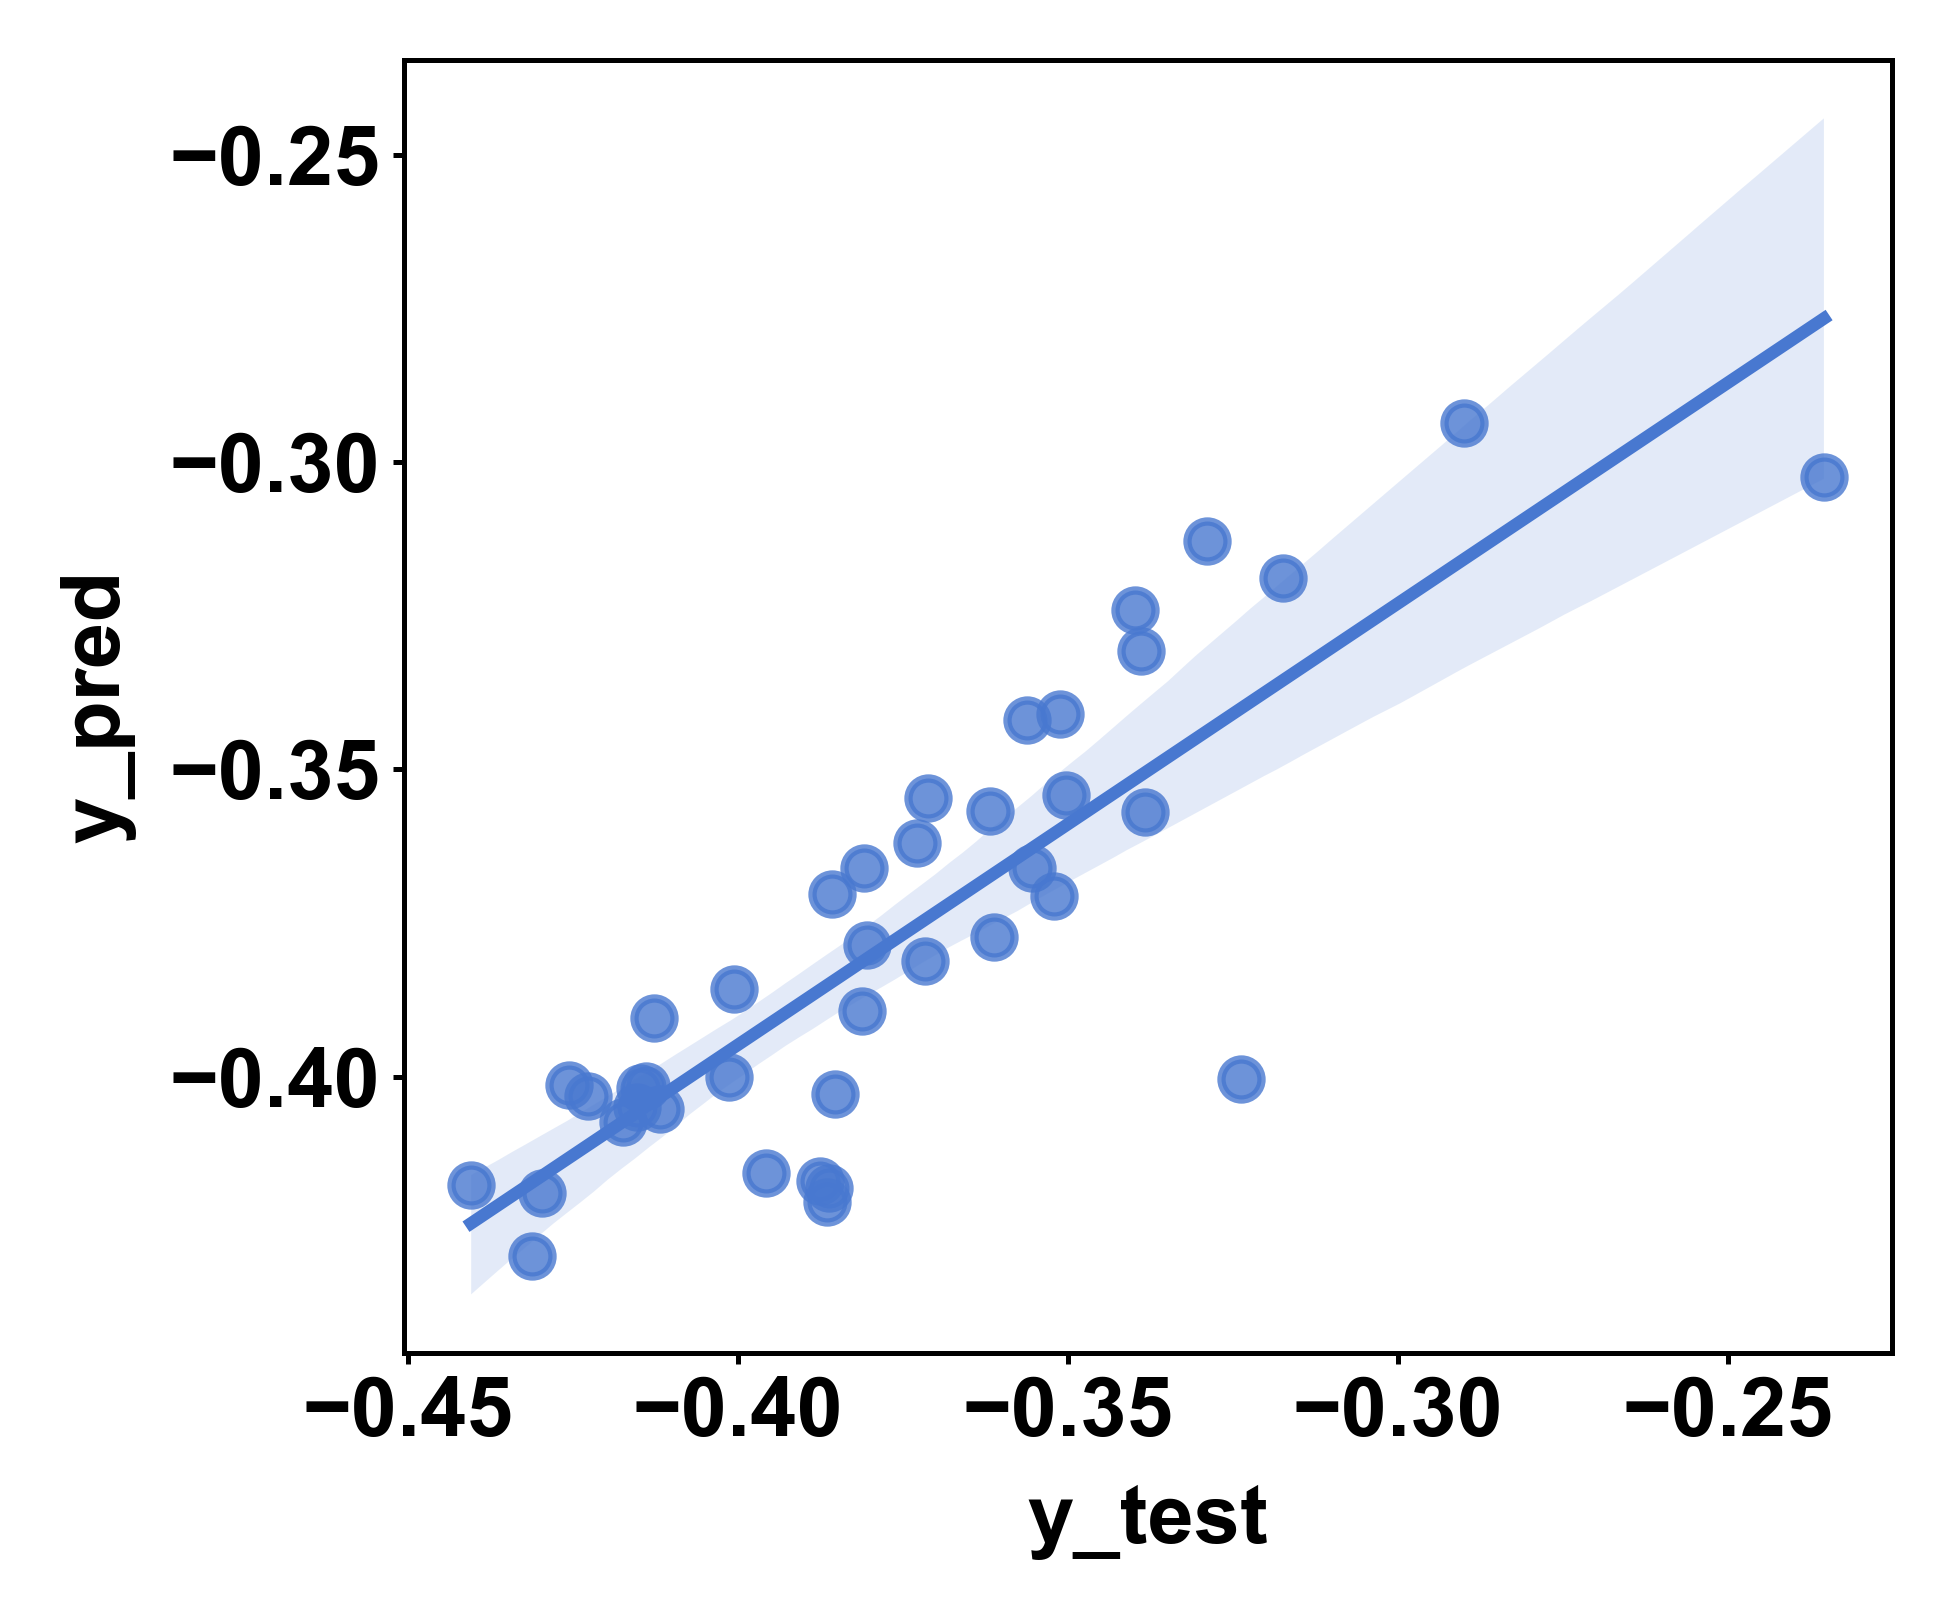

In [15]:

y_test_best_pred=RI_best.predict(X_test_best_standard)


x_best_2,y_best_2=pd.Series(y_test_best,name='y_test'),pd.Series(y_test_best_pred,name='y_pred')
sns.regplot(x=x_best_2,y=y_best_2)
plt.show

rmse = np.sqrt(mean_squared_error(y_test_best,y_test_best_pred))
r2 = r2_score(y_test_best,y_test_best_pred)


print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_test_best,y_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

test Mean Absolute Error MAE: 0.012377698551790514
test rmse scores :  0.01576148714306007
test R2 scores :  0.6427803631132548


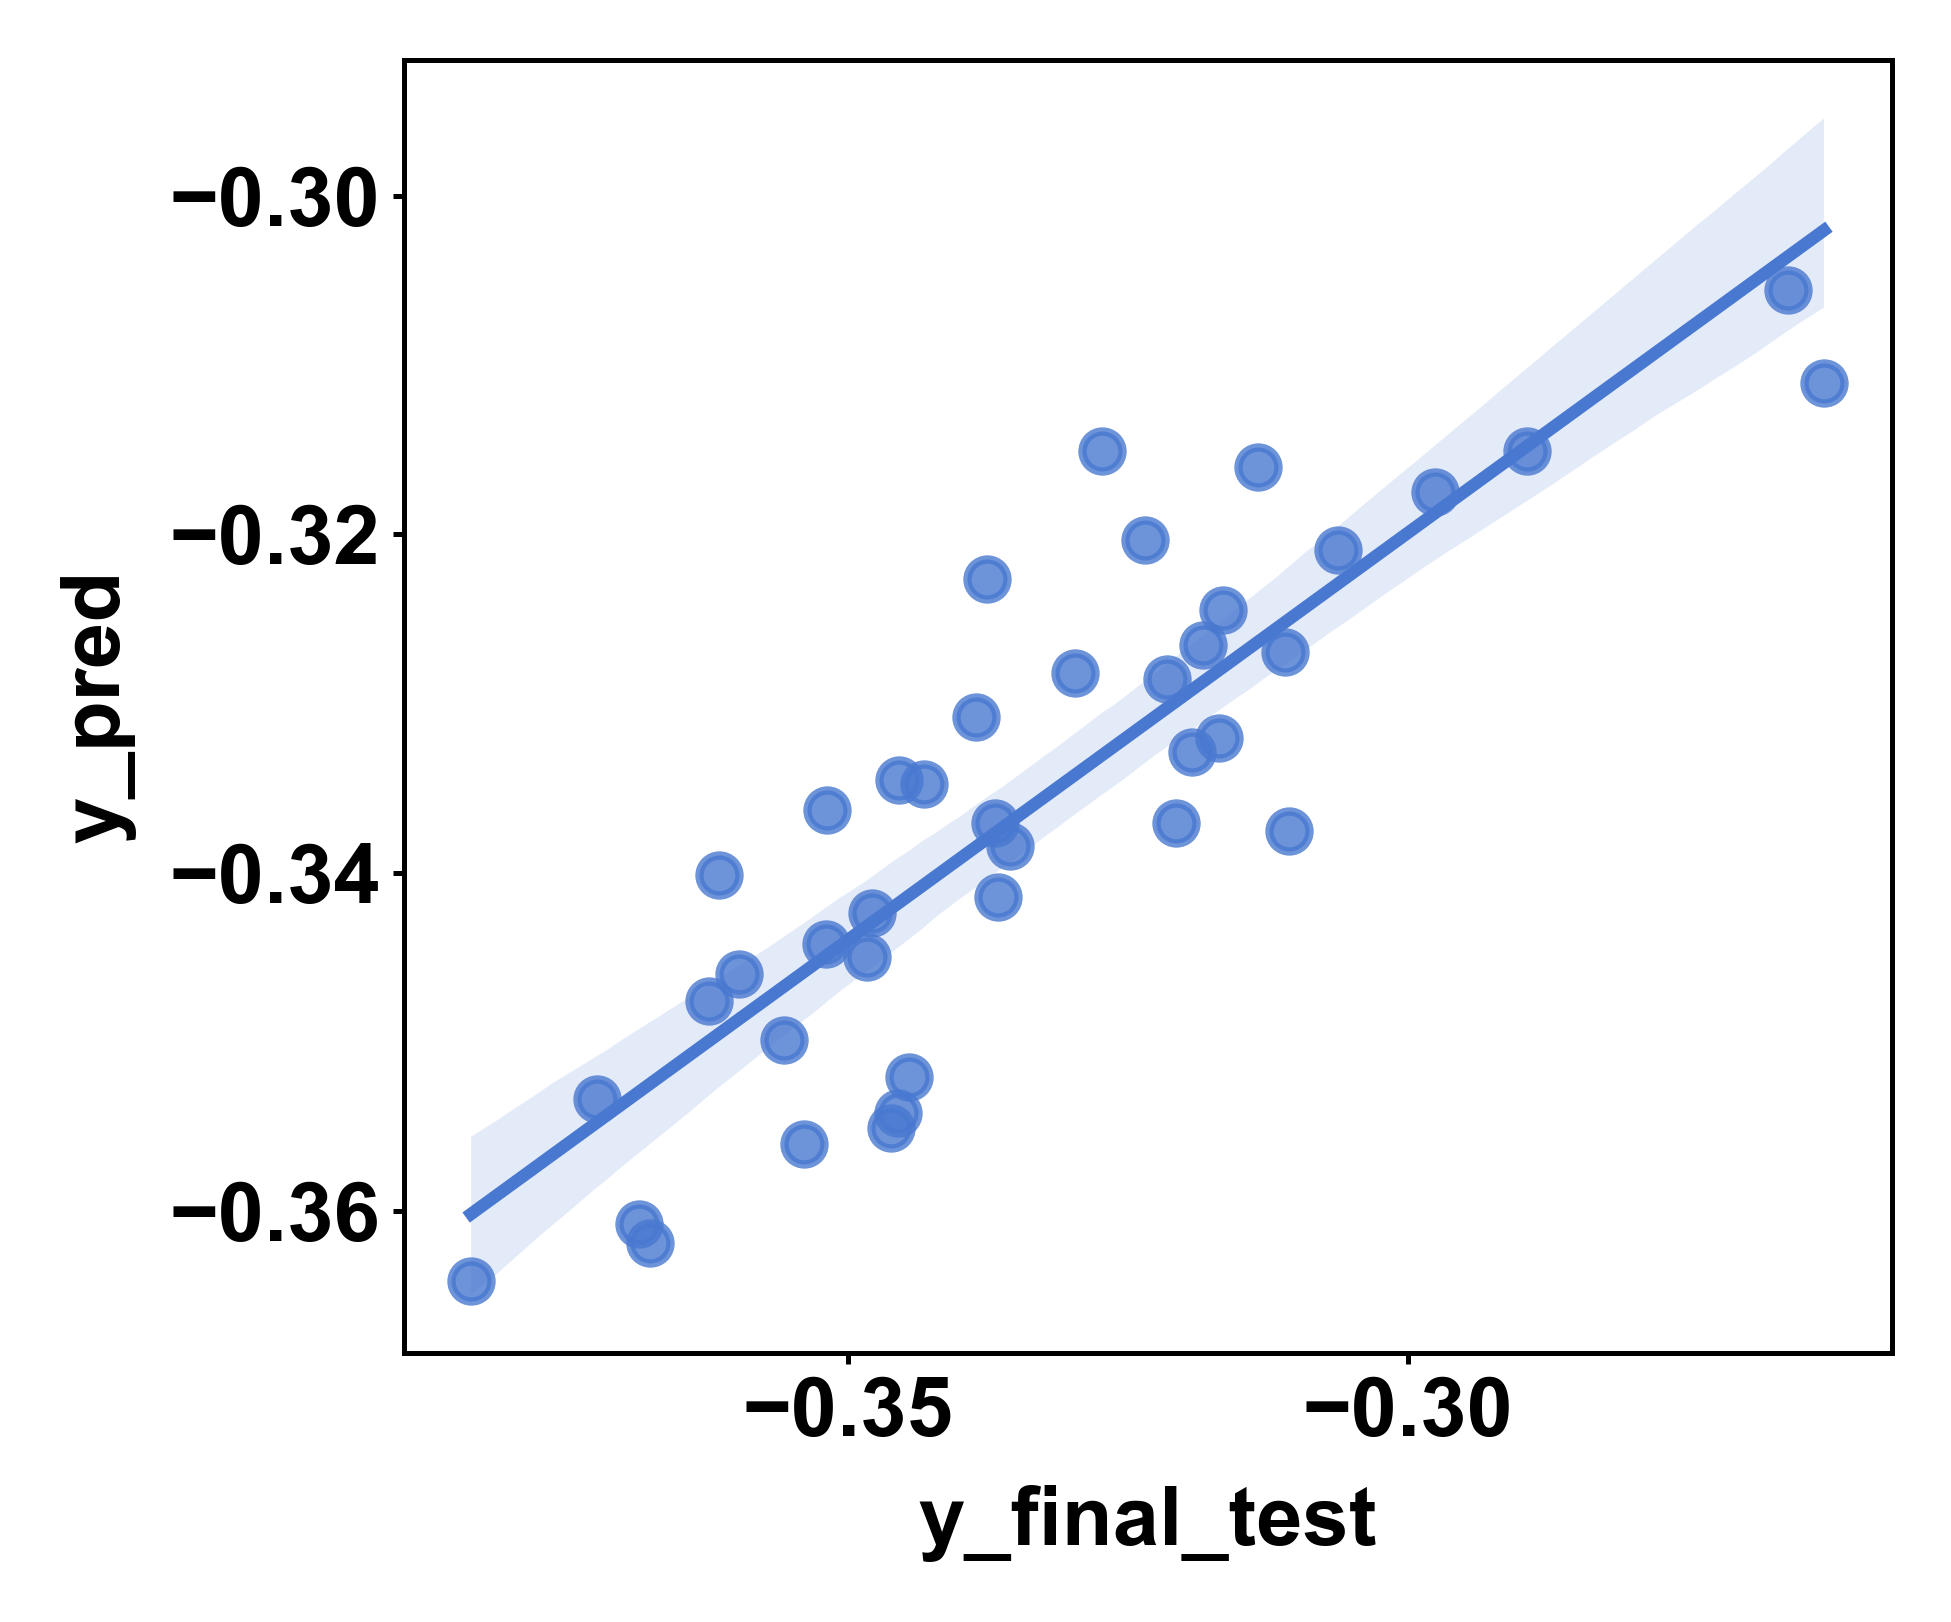

In [16]:

y_final_test_best_pred=RI_best.predict(X_final_test_standard_best)


x_best_3,y_best_3=pd.Series(y_final_test_np,name='y_final_test'),pd.Series(y_final_test_best_pred,name='y_pred')
sns.regplot(x=x_best_3,y=y_best_3)
plt.show

rmse = np.sqrt(mean_squared_error(y_final_test_np,y_final_test_best_pred))
r2 = r2_score(y_final_test_np,y_final_test_best_pred)


print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_final_test_np,y_final_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)